# Basics of Statistics

In [1]:
from scipy import stats 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import style


plt.style.use('seaborn')

## Type of data

### Continuous

Any value within an interval is acceptable. like float, interval

In [2]:
cv = np.random.random_sample(10) # continuous values 
cv

array([0.66031092, 0.65617515, 0.03930539, 0.09361998, 0.85361171,
       0.69670654, 0.91267306, 0.59063556, 0.48679222, 0.64625406])

### Discrete

Only integers are acceptable. countables.

In [3]:
dv = np.random.randint(0,10,10) # discrete values 
dv

array([6, 8, 2, 2, 3, 9, 5, 8, 5, 6])

### Categorical

#### Ordinal

Categorical data with explicit ordering. Like encoded in a series

In [4]:
np.array([1, 2, 3, 4, 5])

array([1, 2, 3, 4, 5])

#### Nominal

specific set of values from a category. there is no ordering, counting.

In [5]:
np.array([
    'apple',
    'orange',
    'grapes'
])

array(['apple', 'orange', 'grapes'], dtype='<U6')

### Binary

only two possible categories, like a switch.

In [6]:
np.array([True, False])

array([ True, False])

## Location Estimates

### mean(average)

$\mu=\frac{1}{m}\sum_{i=1}^{m}X^{(i)}$

In [7]:
dv,dv.mean()

(array([6, 8, 2, 2, 3, 9, 5, 8, 5, 6]), 5.4)

### trimmed mean

sorted values are trimmed p values from edges,to remove extreme values for mean calculation.

$\mu = \frac{\sum_{i=p+1}^{m-p} X^{(i)}}{m - 2p}$

In [8]:
p = 2

dv.sort()

dv, dv[p : -p].mean()

(array([2, 2, 3, 5, 5, 6, 6, 8, 8, 9]), 5.5)

### weighted mean

mean where weights are associated to the values.

$\mu_w=\frac{\sum_{i=1}^{m} w^{(i)} X^{(i)}}{\sum_{i=1}^{m}w^{(i)}}$

In [9]:
x = np.random.random_sample(10) 
w = np.random.randint(1,4,10)

x, w, (x * w).sum() / w.sum()

(array([0.47831889, 0.15173979, 0.65283203, 0.49839894, 0.12887122,
        0.40593656, 0.46486771, 0.03209976, 0.96926736, 0.72582018]),
 array([1, 2, 2, 3, 1, 3, 1, 1, 1, 2]),
 0.4616009083013748)

### median

the value such that one-half of the data lies above and below.
(like 50th percentile)

why do we need median? It has less sensitive to data but still what value it can give. median only depends on the data that is located in the center of the sorted array.

so lets take an example of comparing two sets of values of incomes of two regions. if one region has an outlier(very very very rich people). then mean will be a lot different then median. so to compare most common salaries of these two regions, mean will not give best results.

In [10]:
x = np.random.random_sample(10) 
x

array([0.34440759, 0.02302378, 0.26151817, 0.29985192, 0.47751307,
       0.60439014, 0.40955753, 0.27753061, 0.46542145, 0.66317304])

In [11]:
sorted(x), np.median(x)

([0.023023778580702925,
  0.26151816856942345,
  0.27753060775839367,
  0.29985191612402406,
  0.3444075862196835,
  0.4095575286433396,
  0.46542144991510237,
  0.4775130708375265,
  0.6043901382260869,
  0.6631730366737562],
 0.37698255743151154)

### mode

The most commonly occurring category or value in a data set.
`It is generally used for categorical dataset and not for numerical dataset.`

In [12]:
categorical_data = np.array([
    'apple',
    'orange',
    'mango',
    'orange',
    'orange',
    'orange',
    'mango',
    'mango',
    'mango'
])

In [13]:
from collections import Counter

In [14]:
category_counts = Counter(categorical_data)
category_counts

Counter({'apple': 1, 'orange': 4, 'mango': 4})

Text(0, 0.5, 'Frequency')

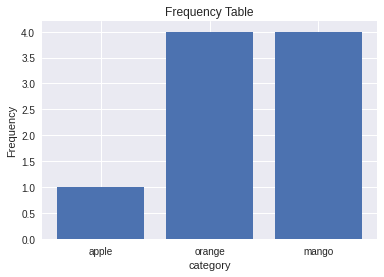

In [15]:
plt.bar(category_counts.keys(),category_counts.values())
plt.title("Frequency Table")
plt.xlabel("category")
plt.ylabel("Frequency")

In [16]:
category_counts

Counter({'apple': 1, 'orange': 4, 'mango': 4})

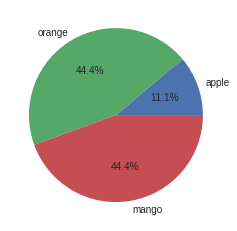

In [17]:
plt.pie(category_counts.values(),labels=category_counts.keys(),autopct='%1.1f%%')
plt.show()

In [18]:
stats.mode(categorical_data)

ModeResult(mode=array(['mango'], dtype='<U6'), count=array([4]))

## Variability Estimates

variability or dispersion to signify whether the data values are tightly clustered or spread out.

### deviation

difference between observed value and estimate of location.

### mean absolute deviation (MAD)

$\text{mean absolute deviation} = \frac{\sum{|x - \bar{x}|}}{n}$

like manhattan norm, l1-norm

In [19]:
x = np.random.random_sample(10) 
x

array([0.75856087, 0.27304572, 0.34091385, 0.65378246, 0.60178779,
       0.61511515, 0.06909667, 0.62935881, 0.59193468, 0.92534561])

In [20]:
x, np.abs(x - x.mean()).sum() / x.shape[0]

(array([0.75856087, 0.27304572, 0.34091385, 0.65378246, 0.60178779,
        0.61511515, 0.06909667, 0.62935881, 0.59193468, 0.92534561]),
 0.19092524774625713)

### variance 

population variance $\sigma^2 = \frac{\sum{(x - \mu)^2}}{n}$

sample variance $s^2 = \frac{\sum{(x - \bar{x})^2}}{n-1}$


Alternate formula

\begin{align}
\Sigma{(x - \mu)}^2 &= \Sigma{(x^2 - 2 x \mu + \mu^2)}\\
&= \Sigma{x^2} - 2 \mu \Sigma{x} + \Sigma \mu^2\\
\because \Sigma{x} = n\mu\\
&= \Sigma{x^2} - 2n \mu^2 + \mu^2 \Sigma{1}\\
&= \Sigma{x^2} - 2n \mu^2 + n\mu^2\\
\Sigma{(x - \mu)}^2 &= \Sigma{x^2} - n \mu^2\\
\sigma^2 &= \frac{\sum{(x - \mu)^2}}{n} = \frac{\Sigma{x^2}}{n} - \mu^2
\end{align}

average of squared difference of each datapoint from dataset's mean

In [21]:
sorted(dv), dv.var(), np.square(dv - dv.mean()).sum() / dv.shape[0] #ddof = 0

([2, 2, 3, 5, 5, 6, 6, 8, 8, 9], 5.640000000000001, 5.640000000000001)

In [22]:
dv.var(ddof=1), np.square(dv - dv.mean()).sum() / (dv.shape[0] - 1) #ddof = 1

(6.2666666666666675, 6.2666666666666675)

### degree of freedom(dof)

degree of freedom describes freedomto vary. The number of observations in data that are free to vary while estimating statistical parameters.

eg:- if there are 10 values and sum of all values = n * avg\
like avg = 3.5 and sum of all values = 35

so with possibility that first value could vary and so on 9 values are free to vary but the 10th value is not free to vary because the sum should be 35.

`10th value should be a specific number.`

degree of freedom = number of observation - number of required relations among the observations

In variance denominator is n-1 not n. But why though? generally n is too large so n or n-1 doesn't create much difference. 

but if we use n as denominator in variance formula, we are underestimating the true value of variance and std deviation in the population. Called **biased estimate**

and if we use n-1 as denominator then standard deviation becomes an **unbiased estimate**


### standard deviation 

standard deviation is easier to explain as it is on the same scale as the original data.


population standard deviation $\sigma = \sqrt \frac{\sum{(x - \mu)^2}}{n}$

sample standard deviation $s = \sqrt \frac{\sum{(x - \bar{x})^2}}{n-1}$

In [23]:
## sqrt of variance 
dv, dv.std(ddof=0) # ddof = 0

(array([2, 2, 3, 5, 5, 6, 6, 8, 8, 9]), 2.3748684174075834)

In [24]:
dv, dv.std(ddof=1) # ddof = 1

(array([2, 2, 3, 5, 5, 6, 6, 8, 8, 9]), 2.503331114069145)

### range (max - min)

In [25]:
dv, np.ptp(dv)

(array([2, 2, 3, 5, 5, 6, 6, 8, 8, 9]), 7)

### percentile 

$Percentile = \frac{rank of value(r_x)}{total values(N)} * 100$

$r_x = \frac{Percentile}{100} * {N}$


In [26]:
## a value ,below which lies given the percentage of data points 
dv,np.percentile(dv,100, method='lower')

(array([2, 2, 3, 5, 5, 6, 6, 8, 8, 9]), 9)

### Quartiles 

In [27]:
dv, np.percentile(dv,[25,50,75], method='lower')

(array([2, 2, 3, 5, 5, 6, 6, 8, 8, 9]), array([3, 5, 6]))

### Inter Quartile Range (IQR) 

In [28]:
## difference between third quartile Q3 and first quartile Q1

dv, stats.iqr(dv,rng=(25,75), interpolation="lower")

(array([2, 2, 3, 5, 5, 6, 6, 8, 8, 9]), 3)

### skewness
- majority of the data present on side of the distribution 

||||
|-|-|-|
| right skewed | positive value |
| left skewed | negative value |
| unskewed | zero |

#### unskewed

In [29]:
np.random.seed(0)

In [30]:
ucv = stats.norm(0,1).rvs(10000)

In [31]:
ucv.sort()
pdf = stats.norm.pdf(ucv)

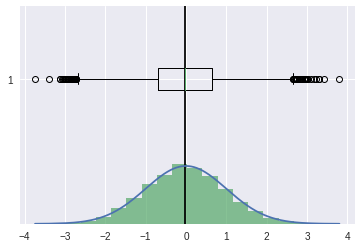

In [32]:
plt.axvline(ucv.mean(),color='k')
plt.plot(ucv,pdf)
plt.hist(ucv,bins=20,density=True,alpha=0.7)
plt.boxplot(ucv,vert=False)
plt.show()

In [33]:
## skewness
stats.skew(ucv)

0.026634616738395525

#### right skewed

In [34]:
scv = stats.skewnorm.rvs(4,size=10000)

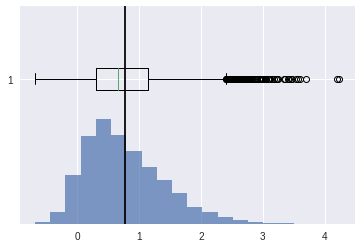

In [35]:
plt.axvline(scv.mean(),color='k')
plt.hist(scv,bins=20,density=True,alpha=0.7)
plt.boxplot(scv,vert=False)
plt.show()

In [36]:
## skewness
stats.skew(scv)

0.8179623055636133

#### left skewed

In [37]:
scv = stats.skewnorm.rvs(-4,size=10000)

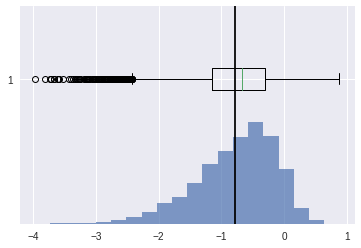

In [38]:
plt.axvline(scv.mean(),color='k')
plt.hist(scv,bins=20,density=True,alpha=0.7)
plt.boxplot(scv,vert=False)
plt.show()

In [39]:
## skewness
stats.skew(scv)

-0.8325460520764684

### Kurtosis

- indicates how much of data is concentrated around mean or shape of the probability distribution.
- default Ficsher definition 
- can be changed to pearson 


In [40]:
ucv = stats.norm(0,1).rvs(10000)

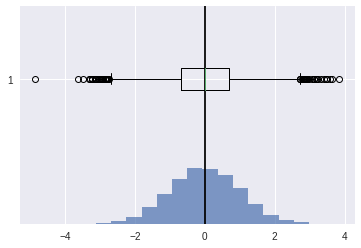

In [41]:
plt.axvline(ucv.mean(),color='k')
plt.hist(ucv,bins=20,density=True,alpha=0.7)
plt.boxplot(ucv,vert=False)
plt.show()

In [42]:
## kurtosis
stats.kurtosis(ucv)

0.016226092494214583

## Multi Variate Analysis

In [43]:
from sklearn.datasets import make_regression

In [44]:
X, y = make_regression(n_samples=1000,n_features=3)

X.shape, y.shape

((1000, 3), (1000,))

### hexbin

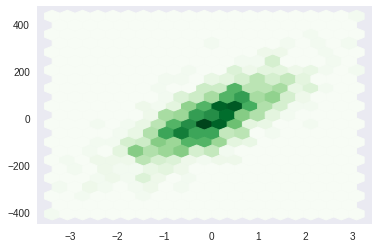

In [45]:
plt.hexbin(X[...,0], y, gridsize = 20, cmap='Greens')
plt.grid()

### boxplot

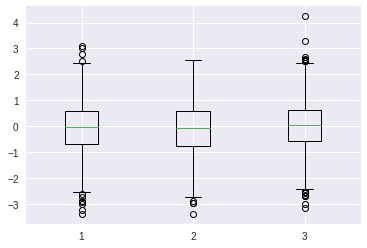

In [46]:
plt.boxplot(X)
plt.show()

### violinplot

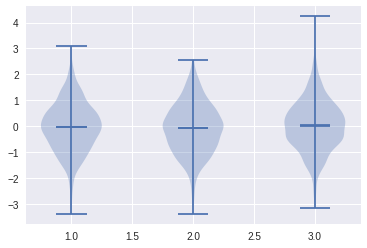

In [47]:
plt.violinplot(X,showmeans=True,showextrema=True,showmedians=True)
plt.show()